## scikit-learn中的SVM

### 解决两分类问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

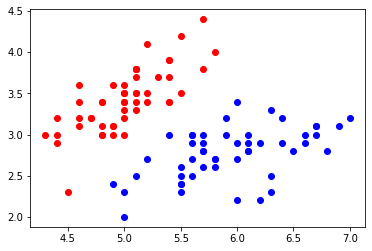

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0)

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


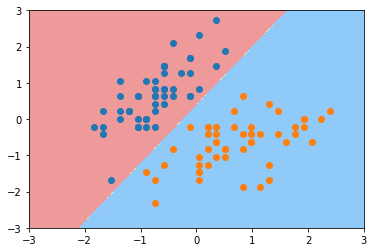

In [7]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [8]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01)

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


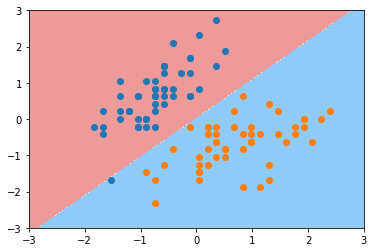

In [9]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [10]:
svc.coef_

array([[ 4.03241517, -2.50700472]])

In [11]:
svc.intercept_

array([0.92733639])

In [12]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


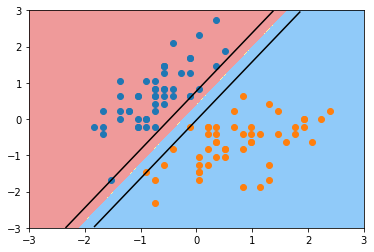

In [13]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


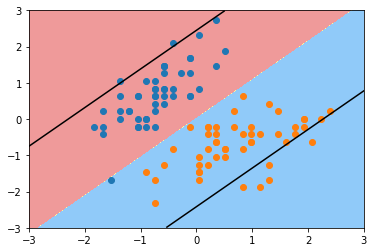

In [14]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

### 解决三分类问题

In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [16]:
iris_feature = 'Calyx length', 'Calyx width', 'Petal length', 'Petal width'
path = '../dataset/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x, y = data[[0, 1]], pd.Categorical(data[4]).codes
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)

In [17]:
# 分类器
clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
# clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(x_train, y_train.ravel())

SVC(C=0.1, kernel='linear')

In [18]:
# 准确率
print(clf.score(x_train, y_train))  # 精度
print('训练集准确率：', accuracy_score(y_train, clf.predict(x_train)))
print(clf.score(x_test, y_test))
print('测试集准确率：', accuracy_score(y_test, clf.predict(x_test)))

# decision_function
print('decision_function:\n', clf.decision_function(x_train))
print('\npredict:\n', clf.predict(x_train))

0.8
训练集准确率： 0.8
0.8
测试集准确率： 0.8
decision_function:
 [[ 2.23327436  0.86782059 -0.2086884 ]
 [-0.18441377  2.18226918  1.01026605]
 [-0.23484387  1.17885164  2.18363523]
 [ 2.21053693  0.99621883 -0.21001569]
 [ 2.23125191  0.90822016 -0.21780963]
 [-0.23548595  1.14446122  2.20715689]
 [ 2.24598673  0.85731286 -0.22467694]
 [-0.19655173  1.12265558  2.15361747]
 [-0.22574542  1.10218037  2.20784054]
 [-0.24414236  1.13665193  2.2237747 ]
 [-0.14561483  2.13979862  1.01688699]
 [-0.23611971  1.09037408  2.2242905 ]
 [-0.18144206  1.11639407  2.13229079]
 [ 2.22984417 -0.17942117  0.82885595]
 [-0.23610198  2.21545576  1.12505945]
 [-0.23288499  1.15608529  2.19660091]
 [-0.23548595  1.14446122  2.20715689]
 [ 1.0435261   2.1824844  -0.19208477]
 [-0.19778702  1.05305756  2.18648264]
 [-0.14323727  2.17574638  0.91145244]
 [ 2.19085086 -0.15482523  0.89309439]
 [ 2.20641253  0.96238077 -0.19995171]
 [ 2.23646686 -0.20533962  0.84813495]
 [-0.23611971  1.09037408  2.2242905 ]
 [ 2.2428571

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  if sys.path[0] == '':


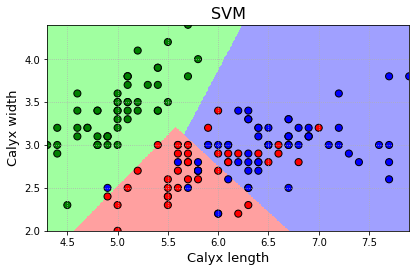

In [19]:
# 画图
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
grid_hat = clf.predict(grid_test)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('SVM', fontsize=16)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()

### SVM解决四分类问题

In [20]:
import numpy as np
from sklearn import svm
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt

def extend(a, b, r=0.01):
    return a * (1 + r) - b * r, -a * r + b * (1 + r)

In [21]:
np.random.seed(0)
N = 200
x = np.empty((4*N, 2))
means = [(-1, 1), (1, 1), (1, -1), (-1, -1)]#四个椭圆的中心
sigmas = [np.eye(2), 2*np.eye(2), np.diag((1,2)), np.array(((3, 2), (2, 3)))]#分别是圆形，圆形，椭圆，倾斜的椭圆（1,3象限）
for i in range(4):
    mn = stats.multivariate_normal(means[i], sigmas[i]*0.1)
    x[i*N:(i+1)*N, :] = mn.rvs(N)
a = np.array((0,1,2,3)).reshape((-1, 1))
y = np.tile(a, N).flatten()

In [22]:
clf = svm.SVC(C=1, kernel='rbf', gamma=1, decision_function_shape='ovr')
# clf = svm.SVC(C=1, kernel='linear', decision_function_shape='ovr')
clf.fit(x, y)
y_hat = clf.predict(x)

In [23]:
acc = accuracy_score(y, y_hat)
np.set_printoptions(suppress=True)
print('预测正确的样本个数：%d，正确率：%.2f%%' % (round(acc*4*N), 100*acc))
# decision_function
print(clf.decision_function(x))
print(y_hat)

预测正确的样本个数：785，正确率：98.12%
[[ 3.26618121  2.01129832 -0.24573672  0.81862279]
 [ 3.25880355  1.87488743 -0.21415863  0.82733979]
 [ 3.25345305  0.93876289 -0.25551767  2.08378999]
 ...
 [-0.19567626  1.86959     0.81813424  3.25517457]
 [ 1.94057704  0.7833094  -0.23724188  3.27320382]
 [-0.22273534  0.79971998  1.81323457  3.27579698]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 

/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/zhao/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65306 missing from current font.
  

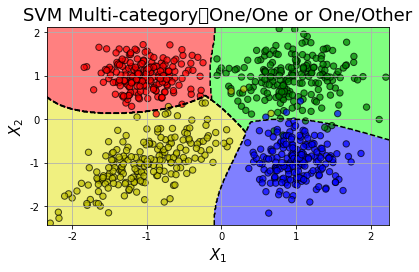

In [24]:
x1_min, x2_min = np.min(x, axis=0)
x1_max, x2_max = np.max(x, axis=0)
x1_min, x1_max = extend(x1_min, x1_max)
x2_min, x2_max = extend(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
x_test = np.stack((x1.flat, x2.flat), axis=1)
y_test = clf.predict(x_test)
y_test = y_test.reshape(x1.shape)
cm_light = mpl.colors.ListedColormap(['#FF8080', '#80FF80', '#8080FF', '#F0F080'])
cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b', 'y'])
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_test, cmap=cm_light)
plt.contour(x1, x2, y_test, levels=(0,1,2), colors='k', linestyles='--')
plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=cm_dark, edgecolors='k', alpha=0.7)
plt.xlabel('$X_1$', fontsize=15)
plt.ylabel('$X_2$', fontsize=15)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.grid(b=True)
plt.tight_layout(pad=2.5)
plt.title('SVM Multi-category: One/One or One/Other', fontsize=18)
plt.show()